<a href="https://colab.research.google.com/github/KunalDM1999/Machine-Learning-project---Predict-the-Success-of-Bank-telemarketing/blob/main/24ds1000109_notebook_t32024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

predict_the_success_of_bank_telemarketing_path = kagglehub.competition_download('predict-the-success-of-bank-telemarketing')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


In [ ]:
# importing all necessary imports
import pandas as pd
import numpy as np
# plot imports
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing import
from category_encoders import TargetEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from datetime import datetime
from category_encoders import TargetEncoder
#model bulding imports
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,VotingClassifier,StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

In [ ]:
# Load the train and test data
train = "/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv"
test = "/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv"
train_data = pd.read_csv(train)
test_data = pd.read_csv(test)
train_data.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [ ]:
train_data['target'].value_counts()

target
no     33384
yes     5827
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


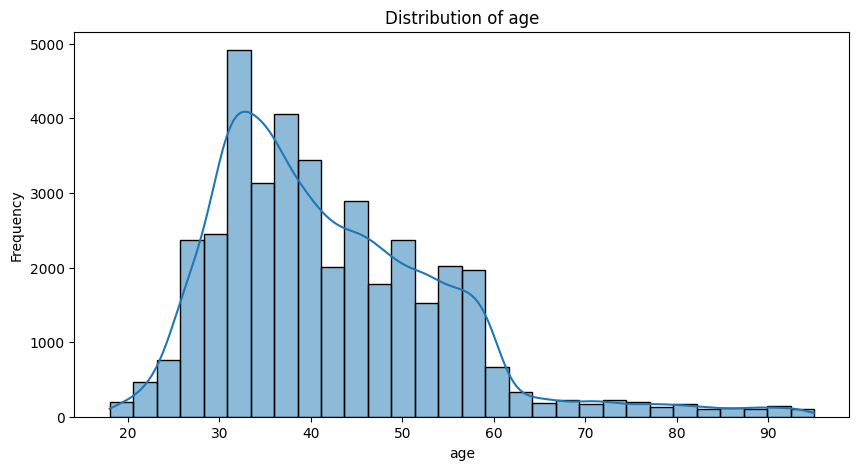

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


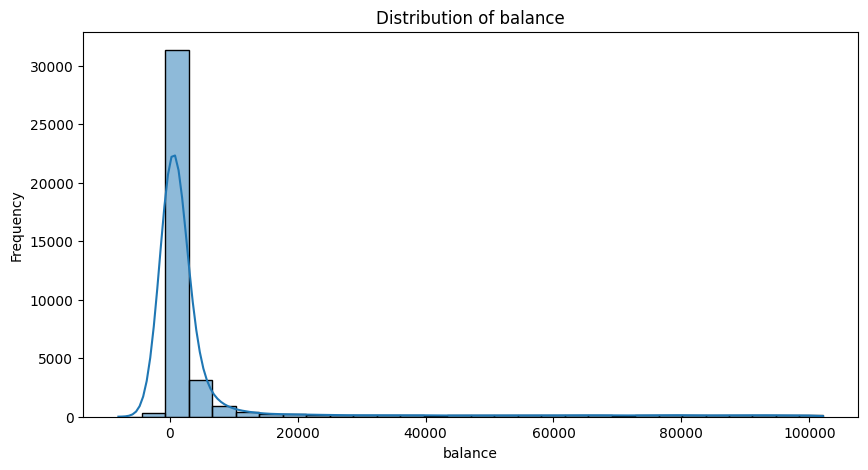

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


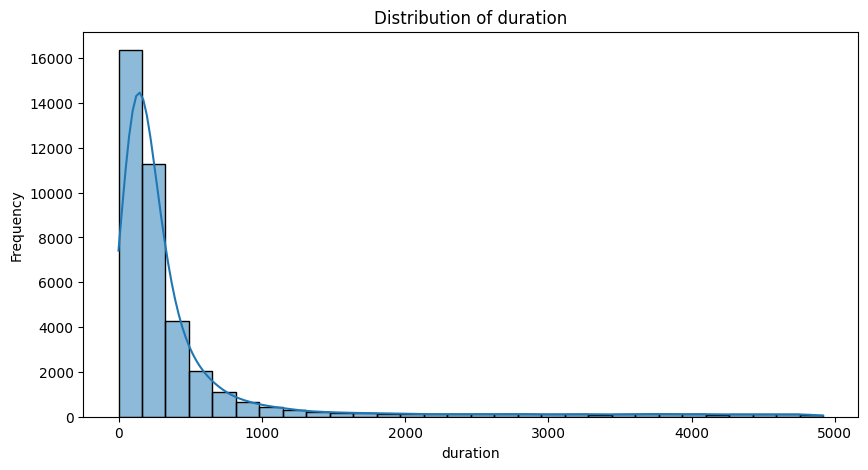

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


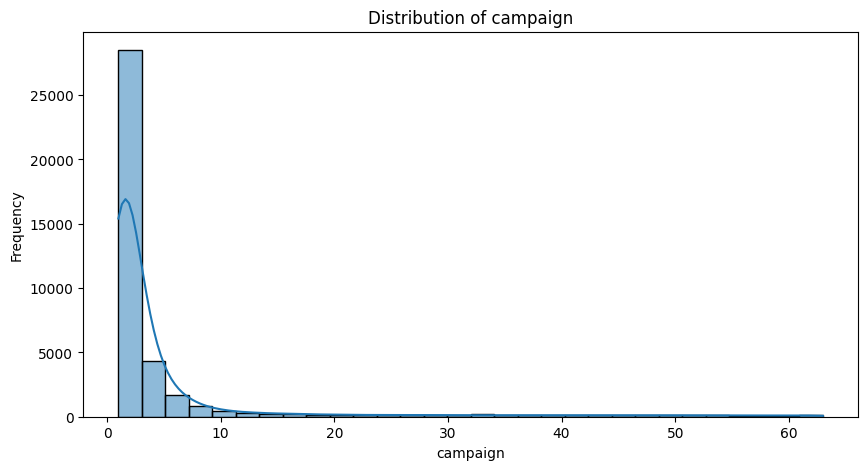

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


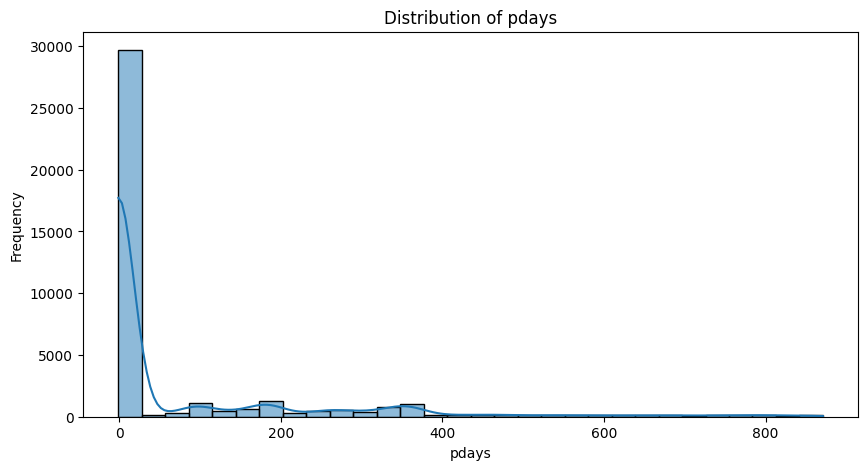

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


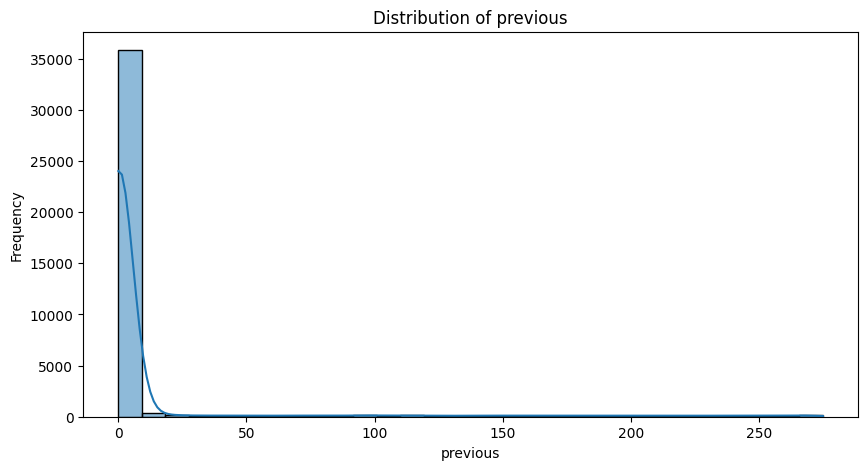

In [ ]:
# Continuous Variable Analysis
continuous_features = ['age', 'balance', 'duration','campaign','pdays','previous']

for feature in continuous_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Observation

**features = 'balance',  'duration', 'campaign', 'pdays', 'previous'   are  found   positively  skewed , so  there is need of using transformation**

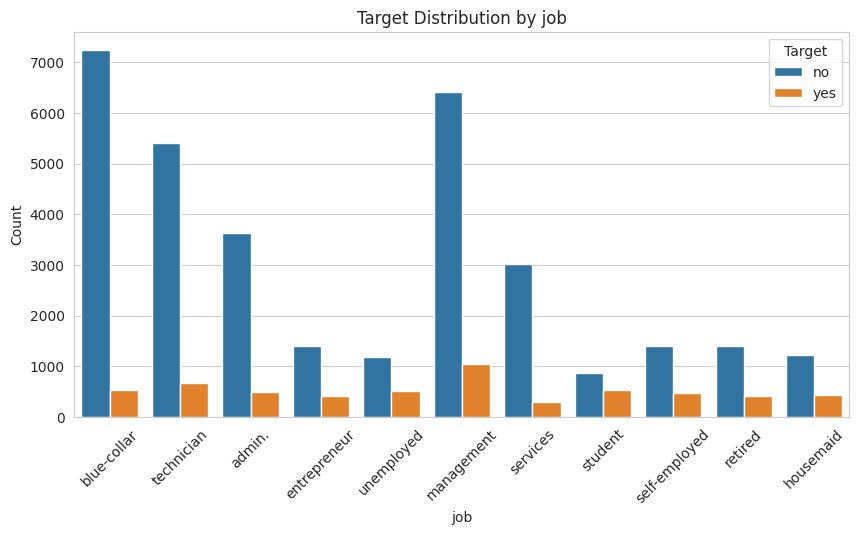

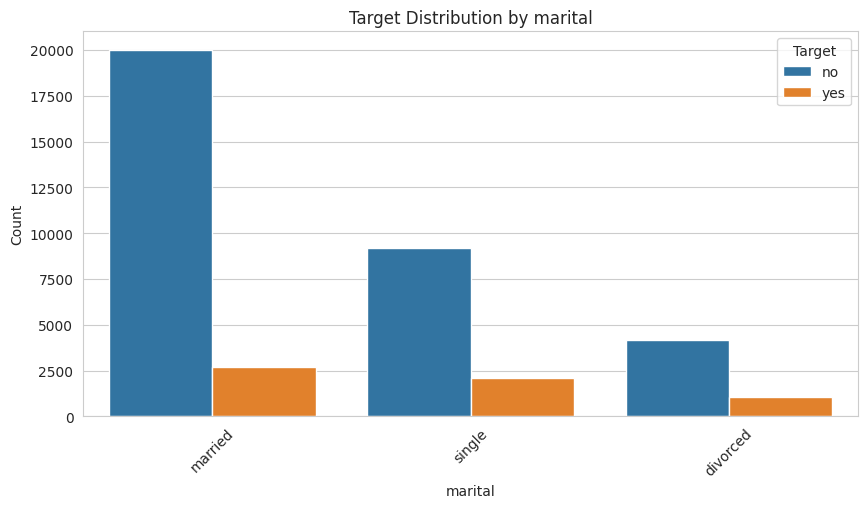

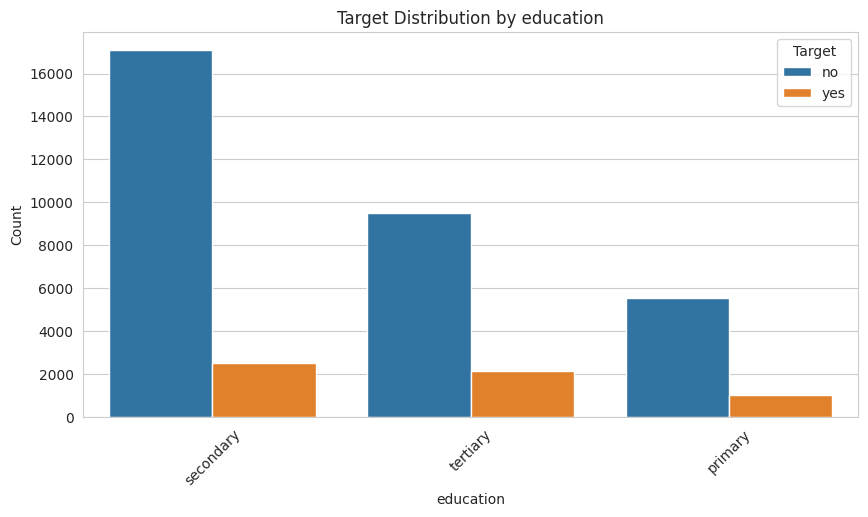

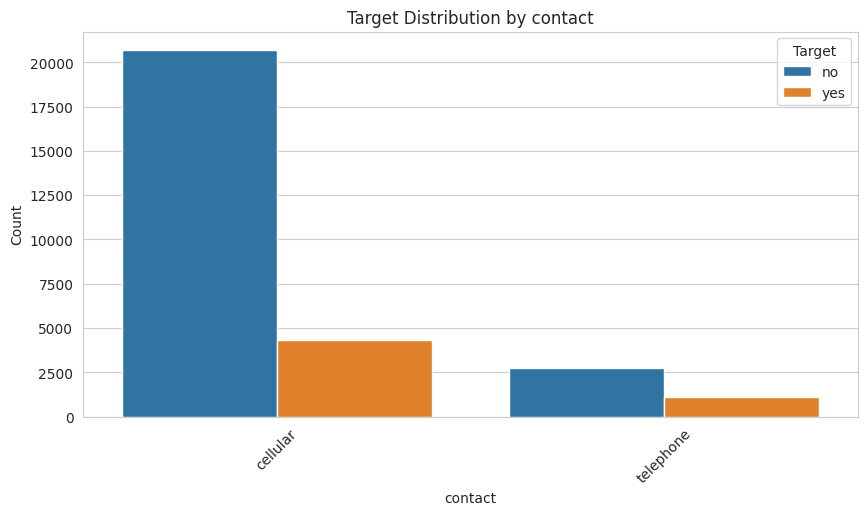

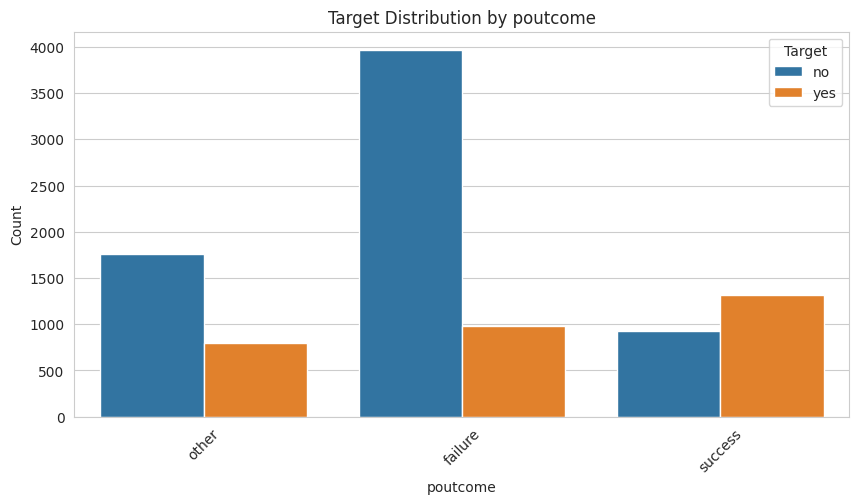

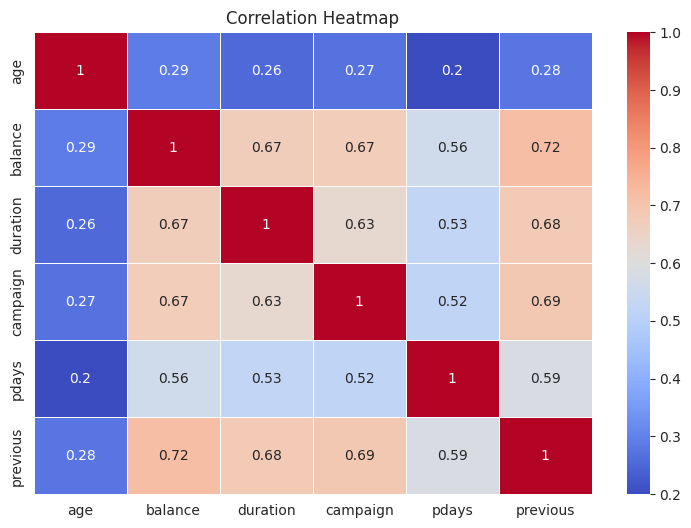

In [ ]:
# Set the plot style
sns.set_style("whitegrid")
# Bivariate Analysis for Categorical Features

categorical_features = ['job', 'marital', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='target', data=train_data)
    plt.title(f'Target Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Target', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

# Correlation
# Select only numerical features for correlation calculation
numerical_data = train_data.select_dtypes(include=['number']) # Select only numerical columns

plt.figure(figsize=(9, 6))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Observations

1. **Some Categories like 'cellular','success','failure','married' of  Categorical Features 'contact', 'poutcome' 'marital'give high spacific target dependence on them**
2. **also data is imbalanced  numbers of 'no' Feature is high**
3. **target dased encoding is to be used**
4. **from Correlation Heatmap it is clear that no high Correlation found between nemurical Features so dimensionality reduction can't to be used**

In [ ]:
target = 'target'
#  Handle Missing Values
columns_to_replace = ['job', 'education', 'contact', 'poutcome']
for column in columns_to_replace:
    train_data[column] = train_data[column].fillna('Unknown')
    test_data[column] = test_data[column].fillna('Unknown')

# Converted 'last contact date' to datetime and split into day, month, and year
for data in [train_data, test_data]:
    data[['year', 'month', 'day']] = data['last contact date'].apply(
        lambda x: pd.Series(datetime.strptime(x, '%Y-%m-%d').timetuple()[:3])
    )
    data.drop(columns=['last contact date'], inplace=True)

# Handle Special Cases for 'pdays'
# Createed a binary feature indicating whether 'pdays' is -1 (not contacted)
train_data['pdays_contacted'] = (train_data['pdays'] != -1).astype(int)
test_data['pdays_contacted'] = (test_data['pdays'] != -1).astype(int)

# Replace -1 with a large value like 999 to distinguish it from the rest of the values
train_data['pdays'] = train_data['pdays'].replace(-1, 999)
test_data['pdays'] = test_data['pdays'].replace(-1, 999)

# Binary Encoding
binary_columns = ['default', 'housing', 'loan']
for col in binary_columns:
    train_data[col] = train_data[col].map({'yes': 1, 'no': 0})
    test_data[col] = test_data[col].map({'yes': 1, 'no': 0})

#  Ordinal Encoding for 'education'
ordinal_columns = ['education']
ordinal_encoder = OrdinalEncoder(categories=[
    ['primary', 'secondary', 'tertiary', 'unknown']
], handle_unknown='use_encoded_value', unknown_value=-1)

train_data[ordinal_columns] = ordinal_encoder.fit_transform(train_data[ordinal_columns])
test_data[ordinal_columns] = ordinal_encoder.transform(test_data[ordinal_columns])

#  One-Hot Encoding for 'job'
#encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
#train_encoded = pd.DataFrame(encoder.fit_transform(train_data[['job']]), columns=encoder.get_feature_names_out(['job']), index=train_data.index)
#test_encoded = pd.DataFrame(encoder.transform(test_data[['job']]), columns=encoder.get_feature_names_out(['job']), index=test_data.index)

# Join the encoded columns and drop the original 'job' column
#train_data = train_data.join(train_encoded).drop('job', axis=1)
#test_data = test_data.join(test_encoded).drop('job', axis=1)

# Target Encoding
target_encoder = TargetEncoder(cols=['marital', 'contact','poutcome','job'], smoothing=0.5)

# target is mapped  to binary for training
train_data['target'] = train_data['target'].map({'yes': 1, 'no': 0})

# Apply target encoding
train_data[['marital', 'contact','poutcome','job']] = target_encoder.fit_transform(
    train_data[['marital', 'contact','poutcome','job']], train_data[target]
)
test_data[['marital', 'contact','poutcome','job']] = target_encoder.transform(
    test_data[['marital', 'contact','poutcome','job']]
)
# Transform Skewed Features (Log Transformation)
skewed_columns = ['duration', 'campaign','pdays','previous']
for col in skewed_columns:
    transformer = FunctionTransformer(np.log1p, validate=True)
    train_data[col] = transformer.fit_transform(train_data[[col]].clip(lower=0))  # Avoid log of negative values
    test_data[col] = transformer.transform(test_data[[col]].clip(lower=0))

# Display the processed data
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target,year,month,day,pdays_contacted
0,26,0.069444,0.118153,1.0,0,647,1,0,0.172913,5.880533,1.098612,5.805135,0.693147,0.310547,0,2009,4,17,1
1,52,0.109905,0.118153,1.0,0,553,1,0,0.281404,5.081404,0.693147,6.907755,0.000000,0.092628,0,2009,10,11,0
2,44,0.069444,0.118153,1.0,0,1397,0,0,0.172913,5.789960,0.693147,6.907755,0.000000,0.092628,0,2010,11,20,0
3,33,0.120019,0.118153,1.0,0,394,1,0,0.281404,4.653960,1.386294,6.907755,0.000000,0.092628,0,2009,9,1,0
4,31,0.224931,0.184000,2.0,0,137,0,0,0.172913,6.100319,1.098612,6.907755,0.000000,0.092628,0,2008,1,29,0


# Key Preprocessing
1. **missing values in  Categorical Features 'job', 'education', 'contact', 'poutcome' are consider as new Category as unknown so no information loss occoures**
2. **new Features 'year', 'month', 'day' are generated , from Features 'last contact date'to  increased complexity in model**
3. **to Handle Special Cases for 'pdays', a binary feature indicating whether 'pdays' is -1 (not contacted) is  created  as 'pdays_contacted' which also  increased complexity in model also  Replace -1 with a large value like 999 to distinguish it from the rest of the values in Features 'pdays'**
4. **Ordinal Encoding for Features 'education' and for all other Categorical Features target encoding is used also One-Hot Encoding for Features 'job' is tryed for better result**
5. **Transformed Skewed Features with Log Transformation except 'balance' Features so that high negative balance value impact will be considered in model training**

In [ ]:
# Define features and target variable
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
X_test = test_data

In [ ]:
# Define the parameter grid for the GradientBoostingClassifier
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [15,20],
    'learning_rate': [0.03,0.05],
    'min_samples_split': [10,12],
    'min_samples_leaf': [5,7],
    'max_features': [None,'sqrt'],
    'subsample': [0.6,0.8]
}

# Initialize the GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Hyperparameters for Gradient Boosting:", grid_search.best_params_)

# Train the model with the best found parameters
best_gb_model = grid_search.best_estimator_

# Predict on the training set
y_train_pred = best_gb_model.predict(X_train)

# Calculate F1 Score on Training Data
f1_score_gb = f1_score(y_train, y_train_pred)
print(f"F1 Score on Training Data (Gradient Boosting): {f1_score_gb:.4f}")

# Predict on the test set
y_test_pred = best_gb_model.predict(X_test)
y_test_pred = pd.Series(y_test_pred).map({1: 'yes', 0: 'no'})

# Prepare the submission file
submission = pd.DataFrame({
    "id": range(0, test_data.shape[0]),
    "target": y_test_pred
})
submission.to_csv('submission.csv', index=False)

In [ ]:
# Generate classification report
print("Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred, target_names=['no', 'yes']))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['no', 'yes'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix on Training Data")
plt.show()

# Learnings
1. **learning_rate=0.03 : A smaller learning rate allows for more gradual learning**
2. **n_estimators=50 : With 50 trees, the model can converge effectively**
3. **max_depth=20 : Deeper trees allow the model to capture more complex patterns**
4. **max_features=None : Using all features for each split leverages potential interactions among features**
5. **min_samples_split=10, min_samples_leaf=5 : These thresholds prevent splits based on small samples**
6. **subsample=0.6: Reducing the data per tree adds generalization**

In [ ]:
# Define the parameter grid for the RandomForestClassifier
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [15,20],
    'min_samples_split': [10,12],
    'min_samples_leaf': [5,7],
    'max_features': [None,'sqrt'],
    'bootstrap': [True,False],
    'class_weight': [{0: 1, 1: 5}]
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

# Train the model with the best found parameters
best_rf_model = grid_search.best_estimator_

# Predict on the training set
y_train_pred = best_rf_model.predict(X_train)

# Calculate F1 Score on Training Data
f1_score_rf = f1_score(y_train, y_train_pred)
print(f"F1 Score on Training Data (Random Forest): {f1_score_rf:.4f}")

# Predict on the test set
y_test_pred = best_rf_model.predict(X_test)
y_test_pred = pd.Series(y_test_pred).map({1: 'yes', 0: 'no'})

# Prepare the submission file
submission = pd.DataFrame({
    "id": range(0, test_data.shape[0]),
    "target": y_test_pred
})
submission.to_csv('submission.csv', index=False)

In [ ]:
# Generate classification report
print("Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred, target_names=['no', 'yes']))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['no', 'yes'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix on Training Data")
plt.show()


# Learnings
1. **class_weight={0: 1, 1: 5} : is need used upweight the minority class (class 1) to improve F1 by focusing on the less frequent outcomes**
2. **max_depth=20 : shows The model performed best with moderately deep trees**
3. **min_samples_split=10, min_samples_leaf=5 : indicate that larger sample requirements at splits and leaves reduce noise**
4. **max_features=None : showed better splits when all features are considered**
5. **bootstrap=True : indicate Using bootstrapping improved stability**
6. **n_estimators=50 :indicate Fewer trees were sufficient for stable performance**

In [ ]:
# Define the parameter grid for the XGBoost model
param_grid = {
    'n_estimators': [500],
    'max_depth': [17,],
    'learning_rate': [0.03,],
    'min_child_weight': [9,],
    'gamma': [0.6,],
    'colsample_bytree': [0.6],
    'colsample_bylevel': [0.5,],
    'reg_alpha': [0.2,],
    'reg_lambda': [0.1,],
    'scale_pos_weight': [len(y_train) / sum(y_train)]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',  # Use F1 score as evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Hyperparameters for XGBoost:", grid_search.best_params_)

# Train the model with the best found parameters
best_xgb_model = grid_search.best_estimator_

# Predict on the training set
y_train_pred = best_xgb_model.predict(X_train)

# Calculate F1 Score on Training Data
f1_score_xgb = f1_score(y_train, y_train_pred)
print(f"F1 Score on Training Data (XGBoost): {f1_score_xgb:.4f}")

# Predict on the test set
y_test_pred= best_xgb_model.predict(X_test)
y_test_pred= pd.Series(y_test_pred).map({1: 'yes', 0: 'no'})

# Prepare the submission file
submission_xgb = pd.DataFrame({
    "id": range(0, test_data.shape[0]),
    "target": y_test_pred
})
submission_xgb.to_csv('submission.csv', index=False)


Best Hyperparameters for XGBoost: {'colsample_bylevel': 0.5, 'colsample_bytree': 0.6, 'gamma': 0.6, 'learning_rate': 0.03, 'max_depth': 17, 'min_child_weight': 9, 'n_estimators': 500, 'reg_alpha': 0.2, 'reg_lambda': 0.1, 'scale_pos_weight': 6.7291916938390255}
F1 Score on Training Data (XGBoost): 0.8340


Classification Report on Training Data:
              precision    recall  f1-score   support

          no       1.00      0.93      0.96     33384
         yes       0.72      1.00      0.83      5827

    accuracy                           0.94     39211
   macro avg       0.86      0.97      0.90     39211
weighted avg       0.96      0.94      0.94     39211



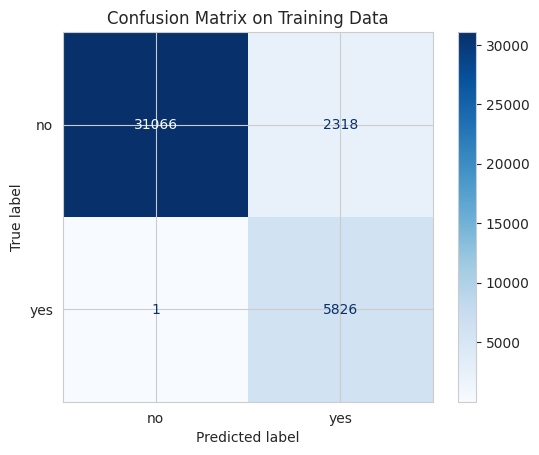

In [ ]:
# Generate classification report
print("Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred, target_names=['no', 'yes']))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['no', 'yes'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix on Training Data")
plt.show()

# Learnings
1. **scale_pos_weight=len(y_train) / sum(y_train ) : indicate this ratio to balance the focus on the minority class, improving recall for better F1 performance**
2. **n_estimators=500 : indicate Use of  higher number of trees allows the model to converge effectively**
3. **max_depth=17 : indicated that deeper trees capture more data relationships**
4. **learning_rate=0.03 : indicate small learning rate fine-tunes the model carefully**
5. **gamma=0.6 : indicate Higher gamma values help the model avoid unnecessary splits**
6. **colsample_bytree=0.6, colsample_bylevel=0.5 : Sampling features at each tree and tree level adds randomness, reducing variance, which stabilizes performance**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Custom F1 scoring metric for cross-validation
f1_scorer = make_scorer(f1_score)

# Define the models with hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=None,
    class_weight={0: 1, 1: 5},
    bootstrap=True
)

gb_model = GradientBoostingClassifier(
    learning_rate=0.03,
    n_estimators=50,
    max_depth=20,
    max_features=None,
    min_samples_leaf=5,
    min_samples_split=10,
    subsample=0.6
)

xgb_model = XGBClassifier(
    reg_lambda=0.1,
    reg_alpha=0.2,
    eval_metric='logloss',
    scale_pos_weight=len(y_train) / sum(y_train),
    n_estimators=500,
    min_child_weight=9,
    max_depth=17,
    learning_rate=0.03,
    gamma=0.6,
    colsample_bytree=0.6,
    colsample_bylevel=0.5
)

# Evaluate each model using cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=f1_scorer)
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring=f1_scorer)
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=f1_scorer)

# Print cross-validation scores for each model
print(f"RandomForest F1 CV Scores: {rf_cv_scores}")
print(f"RandomForest F1 CV Mean Score: {rf_cv_scores.mean():.4f}")

print(f"GradientBoosting F1 CV Scores: {gb_cv_scores}")
print(f"GradientBoosting F1 CV Mean Score: {gb_cv_scores.mean():.4f}")

print(f"XGBoost F1 CV Scores: {xgb_cv_scores}")
print(f"XGBoost F1 CV Mean Score: {xgb_cv_scores.mean():.4f}")

# Compare mean F1 scores
model_scores = {
    "RandomForest": rf_cv_scores.mean(),
    "GradientBoosting": gb_cv_scores.mean(),
    "XGBoost": xgb_cv_scores.mean()
}

# Determine the best model based on cross-validation mean score
best_model_name = max(model_scores, key=model_scores.get)
print(f"The best model based on mean F1 CV score is: {best_model_name} with score {model_scores[best_model_name]:.4f}")


# Comparisons of output of models
1. **RandomForestClassifier give less f1 score as compare to other two models and not have significant overfitting**
2. **GradientBoostingClassifier give good f1 score but highly overfit may be because of the data per tree is less to consider minority class**  
3. **XGBClassifier give high f1 score as compare to other two models and not have significant overfitting**

In [ ]:
#ensemble method
# Define individual models
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=None,
    class_weight={0: 1, 1: 5},
    bootstrap=True
)

xgb_model = xgb.XGBClassifier(
    reg_lambda=0.1,
    reg_alpha=0.2,
    eval_metric='logloss',
    scale_pos_weight=len(y_train) / sum(y_train),
    n_estimators=500,
    min_child_weight=9,
    max_depth=17,
    learning_rate=0.03,
    gamma=0.6,
    colsample_bytree=0.6,
    colsample_bylevel=0.5
)

gb_model = GradientBoostingClassifier(
    learning_rate=0.03,
    n_estimators=50,
    max_depth=20,
    max_features=None,
    min_samples_leaf=5,
    min_samples_split=10,
    subsample=0.6
)

# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('gb', gb_model)],
    voting= 'hard'
)

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = ensemble_model.predict(X_train)

# Calculate F1 Score on Training Data
f1_score_train = f1_score(y_train, y_train_pred)
print(f"F1 Score on Training Data (Ensemble Voting Classifier): {f1_score_train:.4f}")

# Prepare submission for test data using the ensemble model
X_test = test_data
y_test_pred = ensemble_model.predict(X_test)
y_test_pred = pd.Series(y_test_pred).map({1: 'yes', 0: 'no'})

submission = pd.DataFrame({
    "id": range(0, test_data.shape[0]),
    "target": y_test_pred
})

submission.to_csv('submission.csv', index=False)

In [ ]:
# Generate classification report
print("Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred, target_names=['no', 'yes']))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['no', 'yes'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix on Training Data")
plt.show()